In [0]:
import torch # the main framework we are working on
from torchvision import datasets #to get our data (MNIST)
import torchvision.transforms as transforms #and transform it to arrays(tensors) and normalize it
import numpy as np # to deal with math and matrecies
import matplotlib.pyplot as plt 
%matplotlib inline
#above 2 lines for visualizing the data

In [0]:
batch_size = 20
transform = transforms.ToTensor()

train_images = datasets.MNIST(download=True,root='data',train=True,transform=transform)
test_images = datasets.MNIST(download=True,root='data',train=False,transform=transform)
print('we have : ', len(train_images) , ' Train images ,and ',len(test_images) , ' Test images')

train_loader = torch.utils.data.DataLoader(train_images , batch_size=batch_size ,shuffle=True) 
test_loader = torch.utils.data.DataLoader(test_images , batch_size=batch_size ,shuffle=True) 

Processing...
Done!
we have :  60000  Train images ,and  10000  Test images


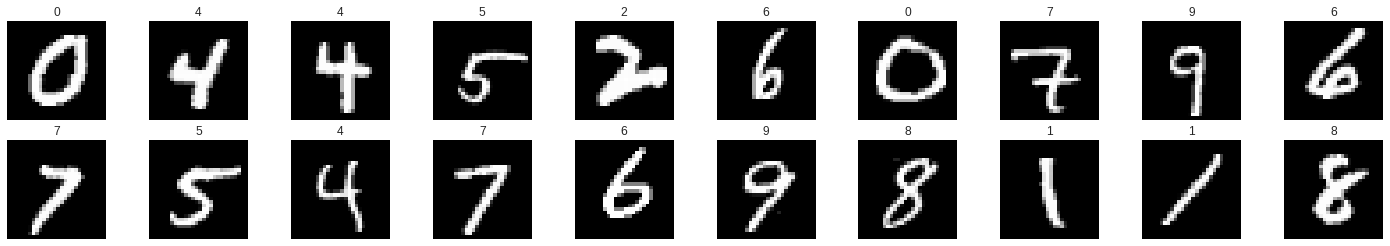

In [0]:
dataIter = iter(train_loader)
images , labels = dataIter.next()
#print(images[0])

fig = plt.figure(figsize=(25,4))
for i in range(batch_size):
  single_image = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  single_image.imshow(np.squeeze(images[i]),cmap='gray')
  single_image.set_title(labels[i].item())


# Defining the Neural Network (MLP).
![](https://qph.fs.quoracdn.net/main-qimg-135b981c38fcd7226730eb974ec33fe8)
# Activation Functions
is this information important or not ?
![alt text](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)

![alt text](https://i.stack.imgur.com/0rewJ.png)

In [0]:
#Defining the Neural Network Architecture
from torch import nn , optim
import torch.nn.functional as F

class neural_network(nn.Module):
  def __init__(self):
    super(neural_network,self).__init__()
    self.fc1 = nn.Linear(784,512)
    self.fc2 = nn.Linear(512,256)
    self.fc3 = nn.Linear(256,10)
  def forward(self,x):
    x = x.view(-1,784) 
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.log_softmax(self.fc3(x),dim=1)
    return x
model = neural_network()
model

neural_network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [0]:
#the loss function and the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

# Cross Entropy
watch this video to understand it
[Video](https://www.youtube.com/watch?v=9r7FIXEAGvs)
or 
Read this article [article](https://medium.com/udacity/shannon-entropy-information-gain-and-picking-balls-from-buckets-5810d35d54b4)

In [12]:
#training the Neural network
epochs = 10
model.train()
for e in range (epochs):
  training_loss = 0
  for images , labels in train_loader:
    #print(images.size(0))
    optimizer.zero_grad()
    output = model.forward(images)
    loss = loss_function(output,labels)
    loss.backward()
    optimizer.step()
    #training_loss += loss.item()*images.size(0)
  #training_loss = training_loss / len(train_loader.dataset)  
  #print("Training Loss ",(training_loss)," for Epoch " , e+1 ,"The loss only is ", loss.item() )
  print("Training Loss (ERROR) is : ",loss.item(),' for Epoch ',e+1)

Training Loss (ERROR) is :  0.02518138289451599  for Epoch  1
Training Loss (ERROR) is :  0.04265517741441727  for Epoch  2
Training Loss (ERROR) is :  0.045326121151447296  for Epoch  3
Training Loss (ERROR) is :  0.18302196264266968  for Epoch  4
Training Loss (ERROR) is :  0.22162596881389618  for Epoch  5
Training Loss (ERROR) is :  0.28245750069618225  for Epoch  6
Training Loss (ERROR) is :  0.12506307661533356  for Epoch  7
Training Loss (ERROR) is :  0.016273293644189835  for Epoch  8
Training Loss (ERROR) is :  0.055556852370500565  for Epoch  9
Training Loss (ERROR) is :  0.0539032407104969  for Epoch  10


In [13]:
#Testing the Neural to see it's accuracy
model.eval() #just to make the neural network know that we are in the evaluation mode so we dont  want to update the weights
correct_for_all = 0
for images , labels in (test_loader):
  output  = model(images)
  _ , pred = torch.max(output,1)
  correct_for_batch = (pred.eq(labels))#we are comparing the model result with the true result stored in the model if true will lead to 1 otherwise 0
  correct_for_all +=correct_for_batch.sum()
  
print("Accuracy = ",(correct_for_all.item()/(len(test_loader)*batch_size))*100, "%")

  

Accuracy =  96.44 %


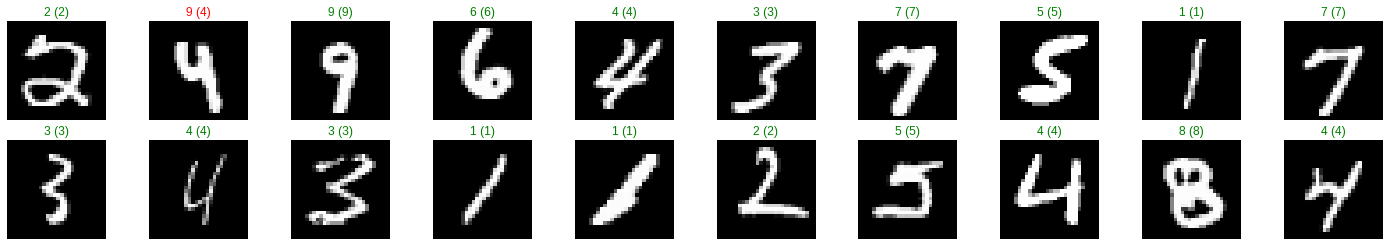

In [14]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))